In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
data = pd.read_csv('BTC-USD.csv')

In [56]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-19,10200.496094,10295.668945,9851.692383,10266.415039,10266.415039,1.993769e+10
1,2019-09-20,10266.318359,10285.872070,10132.186523,10181.641602,10181.641602,1.473419e+10
2,2019-09-21,10183.648438,10188.097656,10000.708008,10019.716797,10019.716797,1.342527e+10
3,2019-09-22,10024.115234,10074.444336,9922.533203,10070.392578,10070.392578,1.319965e+10
4,2019-09-23,10067.962891,10074.238281,9727.143555,9729.324219,9729.324219,1.514493e+10


In [95]:
curs = data.Close.round(3).dropna()

count      366.000000
mean      8843.523560
std       1475.898038
min       4970.788000
25%       7652.029250
50%       8935.923500
75%       9655.958500
max      12254.402000
Name: Close, dtype: float64


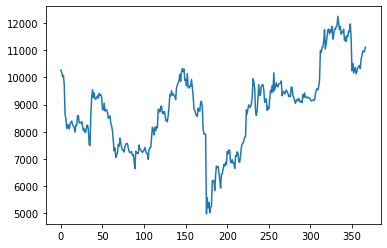

In [96]:
print(curs.describe())
curs.plot()

In [97]:
# X - prediction intro data (14 days prior)
# y - intro data the predictor (7 days future)
future_days = 7
past_days = 14

In [98]:
start = past_days
end = len(curs) - future_days
total = end - start

In [99]:
print(f"start = {start}, end = {end}, total = {total}")

start = 14, end = 359, total = 345


In [100]:
past_X = []
future_y = []

for i in range(start,end):
    X = curs[i-past_days:i]
    past_X.append(list(X))
    y = curs[i:i+future_days]
    future_y.append(list(y))

In [101]:
past_columns = []

for i in range(past_days):
    past_columns.append(f"past_{i}")
print(past_columns)

['past_0', 'past_1', 'past_2', 'past_3', 'past_4', 'past_5', 'past_6', 'past_7', 'past_8', 'past_9', 'past_10', 'past_11', 'past_12', 'past_13']


In [102]:
future_columns = []

for i in range(future_days):
    future_columns.append(f"future_{i}")
print(future_columns)

['future_0', 'future_1', 'future_2', 'future_3', 'future_4', 'future_5', 'future_6']


In [103]:
df_X = pd.DataFrame(data = past_X, columns = past_columns)

In [104]:
df_y = pd.DataFrame(data = future_y, columns = future_columns)

In [105]:
# 1. Train model:
    #Train set
    
X_train = df_X[0:-10]    
y_train = df_y[0:-10]    
# 2. Test model:
    #Test set
X_test = df_X[-10:]
y_test = df_y[-10:]

In [106]:
X_train

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,past_10,past_11,past_12,past_13
0,10266.415,10181.642,10019.717,10070.393,9729.324,8620.566,8486.993,8118.968,8251.846,8245.915,8104.186,8293.868,8343.276,8393.042
1,10181.642,10019.717,10070.393,9729.324,8620.566,8486.993,8118.968,8251.846,8245.915,8104.186,8293.868,8343.276,8393.042,8259.992
2,10019.717,10070.393,9729.324,8620.566,8486.993,8118.968,8251.846,8245.915,8104.186,8293.868,8343.276,8393.042,8259.992,8205.939
3,10070.393,9729.324,8620.566,8486.993,8118.968,8251.846,8245.915,8104.186,8293.868,8343.276,8393.042,8259.992,8205.939,8151.500
4,9729.324,8620.566,8486.993,8118.968,8251.846,8245.915,8104.186,8293.868,8343.276,8393.042,8259.992,8205.939,8151.500,7988.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,11865.698,11892.804,12254.402,11991.233,11758.283,11878.372,11592.489,11681.825,11664.848,11774.596,11366.135,11488.363,11323.397,11542.500
331,11892.804,12254.402,11991.233,11758.283,11878.372,11592.489,11681.825,11664.848,11774.596,11366.135,11488.363,11323.397,11542.500,11506.865
332,12254.402,11991.233,11758.283,11878.372,11592.489,11681.825,11664.848,11774.596,11366.135,11488.363,11323.397,11542.500,11506.865,11711.506
333,11991.233,11758.283,11878.372,11592.489,11681.825,11664.848,11774.596,11366.135,11488.363,11323.397,11542.500,11506.865,11711.506,11680.820


In [247]:
# Regression - predicting the single digit outcome (non-descreet)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
#list models
models_list = ("KNeighborsRegressor", "RandomForestRegressor", "NN")

In [248]:
##Knn
Knn = KNeighborsRegressor()
Knn.fit(X_train, y_train)

    
#forest
forest = RandomForestRegressor(n_estimators=330)
forest.fit(X_train, y_train)


#NN
nn = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)


In [249]:
knn_prediction = Knn.predict(X_test)
forest_prediction = forest.predict(X_test)
nn_prediction = nn.predict(X_test)
models = (knn_prediction, forest_prediction, nn_prediction)
test_models = (knn_prediction[0], forest_prediction[0], nn_prediction[0])

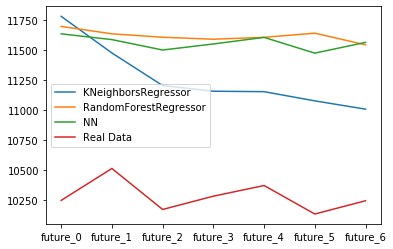

In [280]:
#plot
c = 0
for test in test_models:
    plt.plot(test, label=models_list[c])
    c += 1
    
plt.plot(y_test.iloc[0], label = "Real Data")
plt.legend()

In [304]:
###Measuring Error
##Metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

metrics_list = ("mae", "mse", "msle")
c = 0
for test in test_models:
    
    mae = mean_absolute_error(test, y_test.iloc[0])
    mse = mean_squared_error(test, y_test.iloc[0])
    msle = mean_squared_log_error(test, y_test.iloc[0])
    print(f"{models_list[c]} errors:  MAE-{mae}, MSE-{mse}, msle-{msle}")
    c += 1


KNeighborsRegressor errors:  MAE-986.9584857142854, MSE-1032678.6796282222, msle-0.008829191455455706
RandomForestRegressor errors:  MAE-1339.877721645007, MSE-1811092.2360046073, msle-0.015170765819201565
NN errors:  MAE-1282.2218036001302, MSE-1653258.323521661, msle-0.013918342363125464


##COnclusion
Neural Network performed best at predicting the pattern of behavior of the trend; However, 
Knn did best at predicting the value of the bitcoin